# Hawkes Processes

## Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

In [2]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

# Raster plot

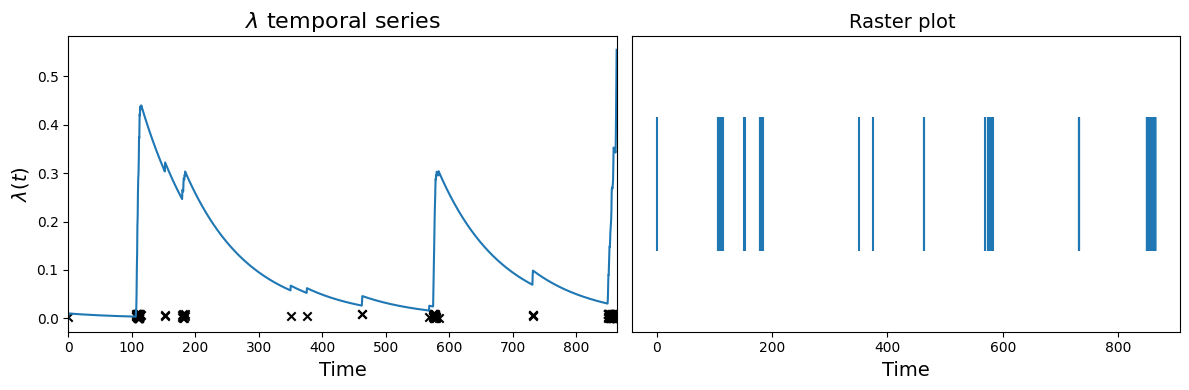

In [41]:
n_events = [0]
times_between_events = [0]
mu = 0.010
rate = [mu]
n = 1
N = 150
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

def intensity(past, t, mu):
    past = np.asarray(past)
    past = past[past < t]
    return mu * np.exp(-mu * (t - past)).sum()


x = np.linspace(0, max(times), 2000)
y = [intensity(times, t, mu) for t in x]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1,2)


ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(x, y)
ax0.set(xlim=[0,max(times)])

ax0.scatter(times, np.random.random(len(times))*0.01, marker="x", color="black")
ax0.set_title('$\lambda$ temporal series', fontsize=16)
ax0.set_xlabel('Time', fontsize=14)
ax0.set_ylabel('$\lambda (t)$', fontsize=14)


ax1 = fig.add_subplot(axgrid[0,1])
ax1.eventplot(times, orientation='horizontal', linelengths=0.5)
ax1.set_xlabel('Time', fontsize=14) 
ax1.set_ylabel('', fontsize=14)
ax1.set_yticks([])
ax1.set_title('Raster plot ', fontsize=14)

plt.tight_layout()
plt.show()


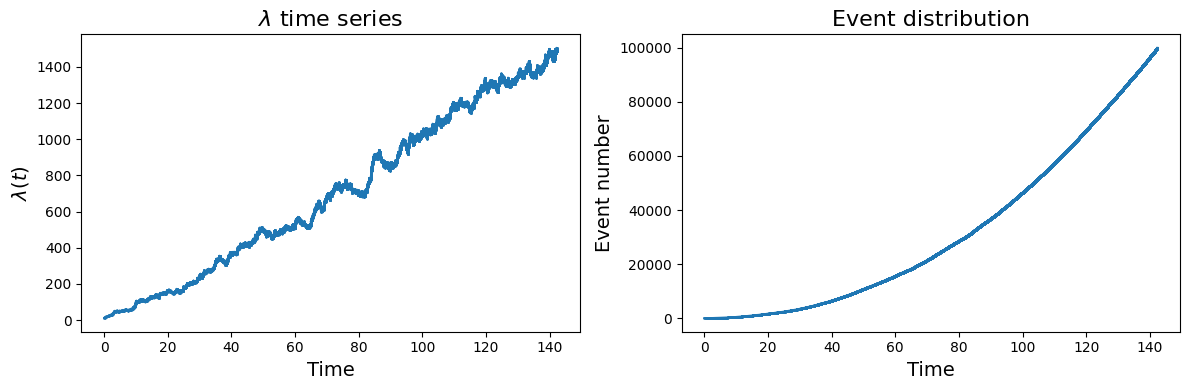

In [63]:
n_events = [0]
times_between_events = [0]
mu = 10
rate = [mu]
N = 10**5
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('$\lambda$ time series', fontsize=16)
ax0.set_xlabel('Time', fontsize=14)
ax0.set_ylabel('$\lambda (t)$', fontsize=14)

ax2 = fig.add_subplot(axgrid[0,1])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Event distribution', fontsize=16)
ax2.set_xlabel('Time', fontsize=14)


#ax2.set_xscale('log')
ax2.set_ylabel('Event number', fontsize=14)


fig.tight_layout()
plt.show()

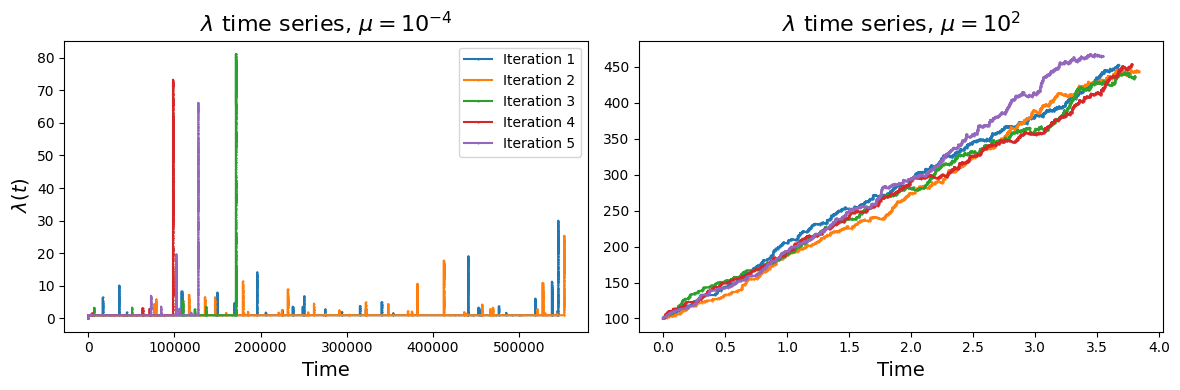

In [9]:
K = 10**3
mus = [10**-4, 10**2]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 2)


for j in range(2):
    ax = fig.add_subplot(axgrid[0,j])
    for i in range(5):
        times, rate = generate_series(K, 1, mus[j])
        plt.plot(times, rate, marker = 'o', ms=0.5, drawstyle = 'steps', label=f'Iteration {i+1}')
    plt.title(f'$\lambda$ time series, $\mu = 10^{ {int(np.log10(mus[j]))} }$', fontsize=16)
    plt.xlabel('Time', fontsize=14)

    
fig.supylabel('$\lambda (t)$', fontsize=14)
fig.axes[0].legend(loc='best')
fig.tight_layout()

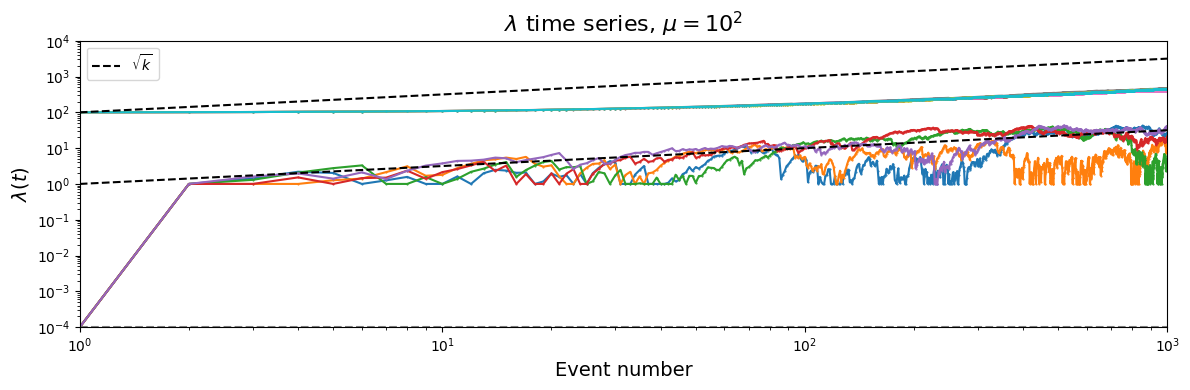

In [2]:
K = 10**3
mus = [10**-4, 10**2]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 2)


for j in range(2):
    for i in range(5):
        times, rate = generate_series(K, 1, mus[j])
        k = np.arange(1, K + 2)
        sqrt = np.sqrt(k)
        plt.plot(k, rate, marker = 'o', ms=0.5)
        plt.xlabel('Event number', fontsize=14)
        plt.ylabel('$\lambda (t)$', fontsize=14)
    plt.title(f'$\lambda$ time series, $\mu = 10^{ {int(np.log10(mus[j]))}}$', fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.axhline(y=10**-4, color='gray', linestyle='--')
plt.xlim(1, K)
plt.ylim(10**-4, 10**4)
plt.plot(k, sqrt, color ='black', linestyle = '--', label= '$\sqrt{k}$')
plt.plot(k, sqrt*100, color ='black', linestyle = '--')

fig.axes[0].legend(loc='best')
fig.tight_layout()

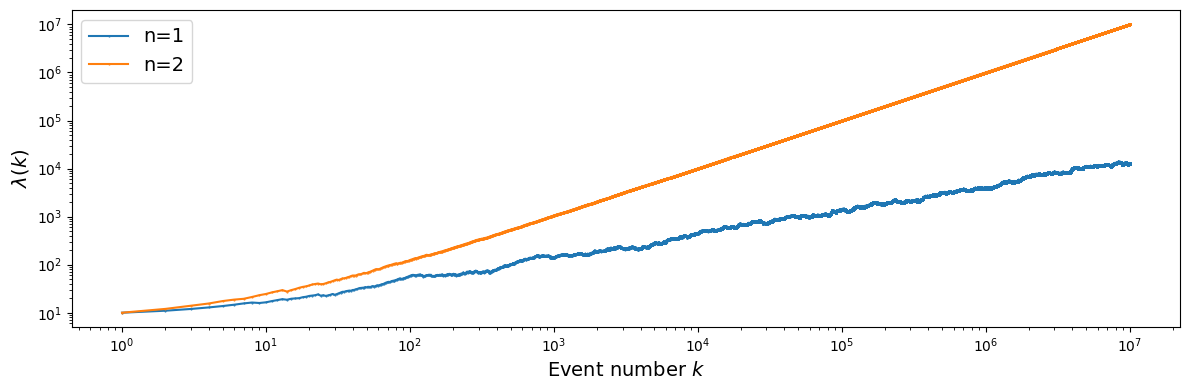

In [16]:
K = 10**7
k = np.arange(1, K + 2)
mus = [10**-4, 10**2]

fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 2)



times, rate = generate_series(K, 1, 10)
plt.plot(k, rate, marker = 'o', ms=0.5, label = 'n=1')
times, rate = generate_series(K, 2, 10)
plt.plot(k, rate, marker = 'o', ms=0.5, label = 'n=2')
plt.xlabel('Event number $k$', fontsize=14)
plt.ylabel('$\lambda (k)$', fontsize=14)

plt.xscale('log')
plt.yscale('log')

fig.axes[0].legend(loc='best', fontsize = 14)
fig.tight_layout()

C:\Users\anton\AppData\Local\Temp\ipykernel_11068\3715703562.py:25: RuntimeWarning: divide by zero encountered in divide
  y = 1/x**2


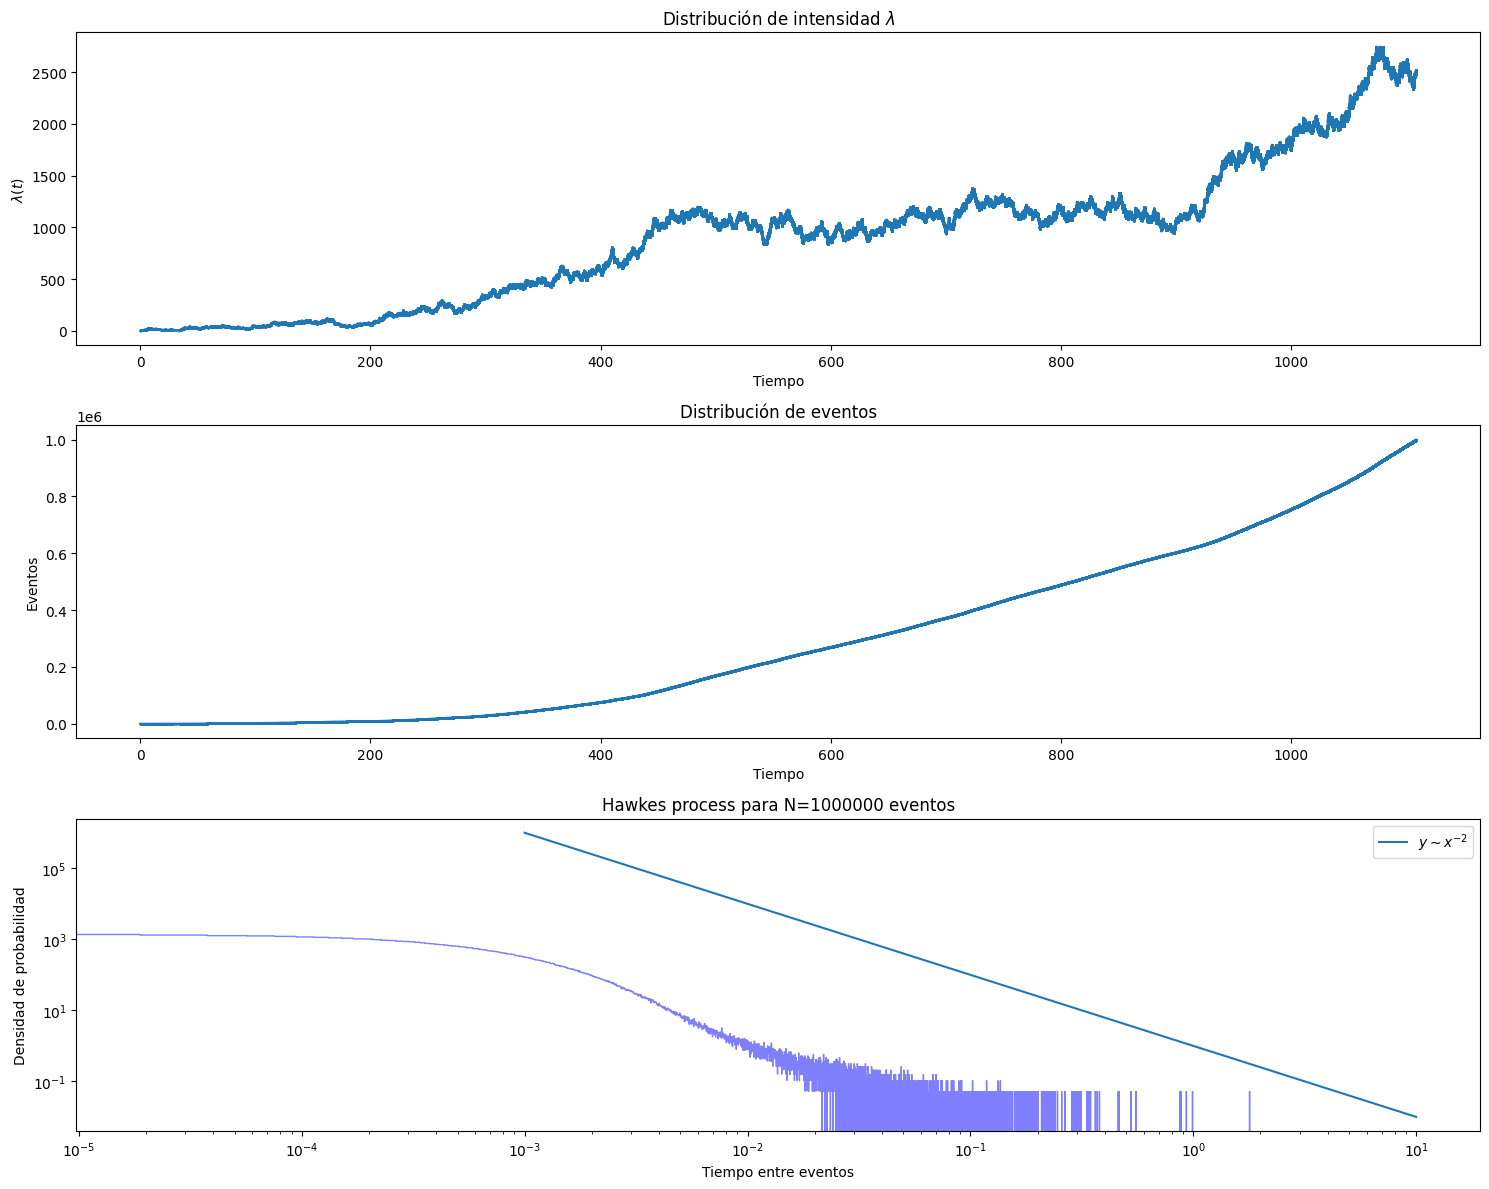

In [4]:
n_events = [0]
times_between_events = [0]
mu = 1
rate = [mu]
N = 10**6
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times_between_events.append(xk)
    n_events.append(i + 1)

times = np.cumsum(times_between_events)

fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.plot(times, rate, marker = 'o', ms=0.5 ,drawstyle = 'steps')
ax0.set_title('Distribución de intensidad $\lambda$')
ax0.set_xlabel('Tiempo')
ax0.set_ylabel('$\lambda (t)$')

ax1 = fig.add_subplot(axgrid[2,0])
x = np.arange(0,10,0.001)
y = 1/x**2
ax1.plot(x, y, label = '$y\sim x^{-2}$')
ax1.hist(times_between_events, bins='auto', density=True, log=True, alpha=0.5, color='blue', histtype='step' )
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title(f'Hawkes process para N={n_events[-1]} eventos')
ax1.legend()
ax1.set_xlabel('Tiempo entre eventos')
ax1.set_ylabel('Densidad de probabilidad')

ax2 = fig.add_subplot(axgrid[1,0])
ax2.plot(times, n_events, marker = 'o', ms=0.5 , drawstyle = 'steps-post')
ax2.set_title('Distribución de eventos')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Eventos')


fig.tight_layout()
plt.show()

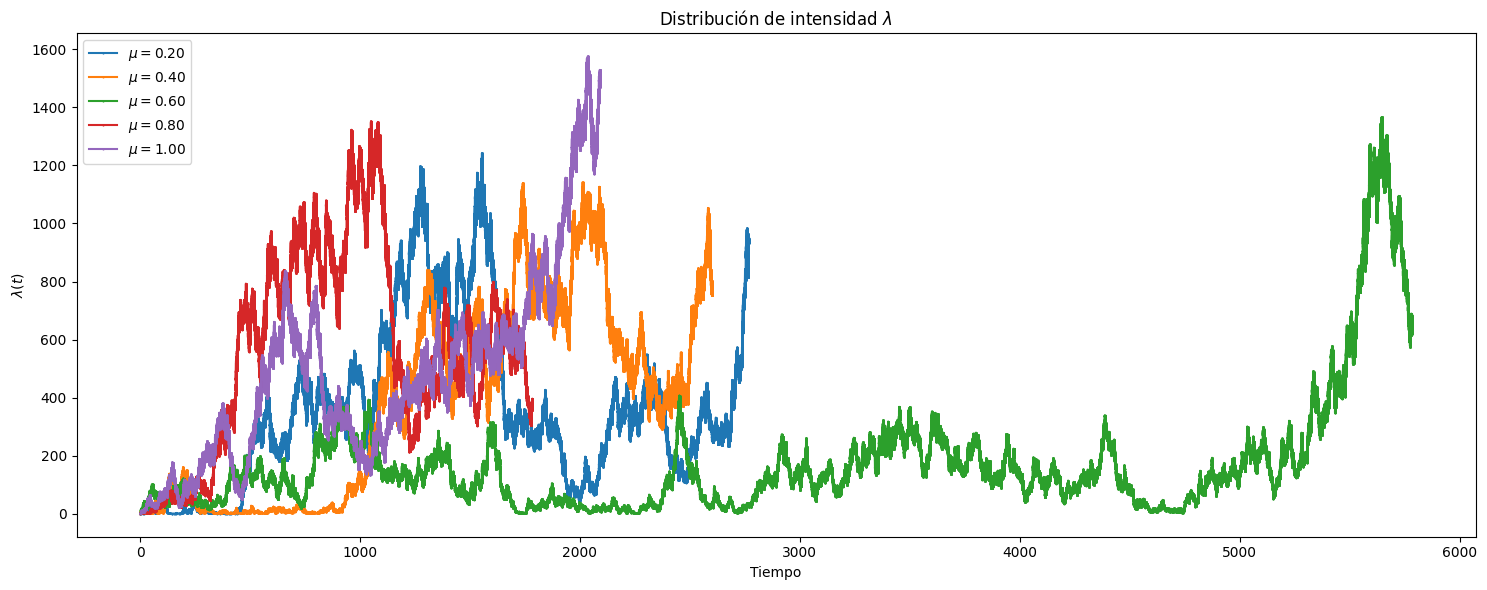

In [5]:
n = 1
mus = np.arange(0.2, 1.2, 0.2)
plt.figure(figsize=(15, 6))
for mu in mus:
    n_events = [0]
    times_between_events = [0]
    rate = [mu]
    for i in range(N): 
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
        n_events.append(i + 1)
    times = np.cumsum(times_between_events)
    plt.plot(times, rate, marker = 'o', ms=0.5 , drawstyle = 'steps', label = f'$\mu={mu:.2f}$')


plt.xlabel('Tiempo')
plt.ylabel('$\lambda (t)$')
plt.title('Distribución de intensidad $\lambda$')
plt.legend()
plt.tight_layout()
plt.show()


# Percolation Strength $P_{\infty}$ plots

[ True False False ... False False False]
1
[ True False False ... False False False]
2
[ True  True False ...  True  True  True]
3
[ True  True  True ...  True  True  True]
4
[ True  True  True ...  True  True  True]
5


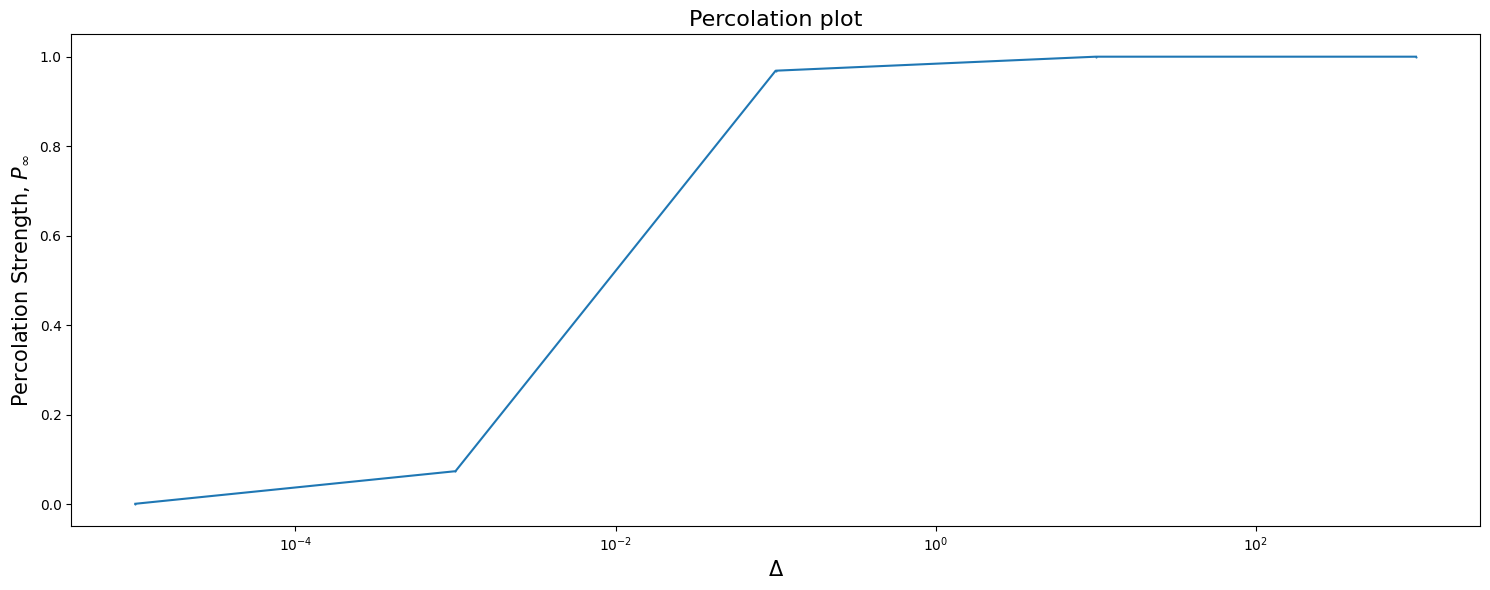

In [3]:
# Generate temporal series
N = 10**4
n = 1
mu = 1
n_events = np.arange(0, N+1)
times_between_events = [0]
rate = [mu]
for i in range(N): 
    rate_tk, xk = algorithm(rate[-1], mu, n)
    rate.append(rate_tk)
    times_between_events.append(xk)
times = np.cumsum(times_between_events)

percolations =[]
deltas =np.logspace(-5, 3, num=5, base=10)

for delta in deltas:
    percolations.append(np.sum((times_between_events) < delta)/N)
    print((times_between_events) < delta)
    print(len(percolations))

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations, marker = 'o', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot', fontsize=16)
plt.tight_layout()
plt.show()

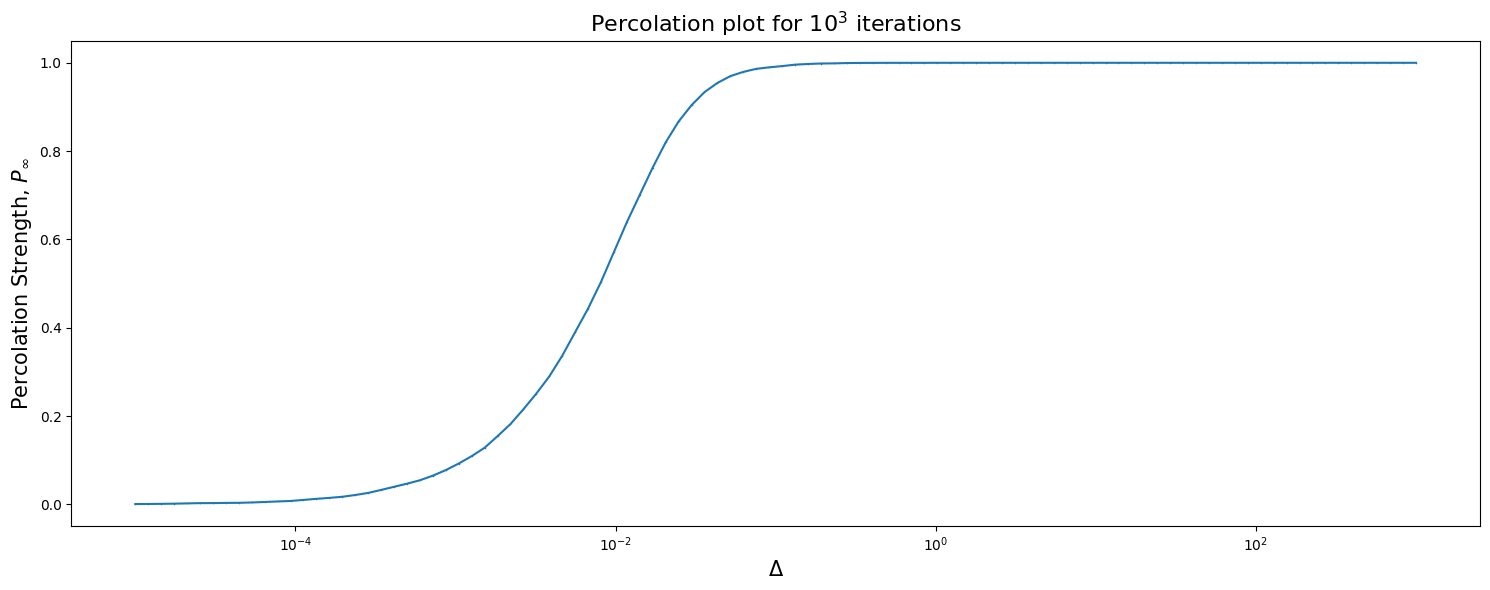

In [7]:
deltas =np.logspace(-5, 3, num=100, base=10)
percolations_means = []
percolation_strength_list = []
n_iters = 1000

for _ in range(n_iters):
    percolations = []
    for delta in deltas:
        percolations.append(np.sum((times_between_events) < delta)/N)
    percolation_strength_list.append(percolations)
    #print(_)
percolations_means = np.mean(percolation_strength_list, axis=0)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations_means, marker = 'x', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot for $10^3$ iterations', fontsize=16)
plt.tight_layout()
plt.show()

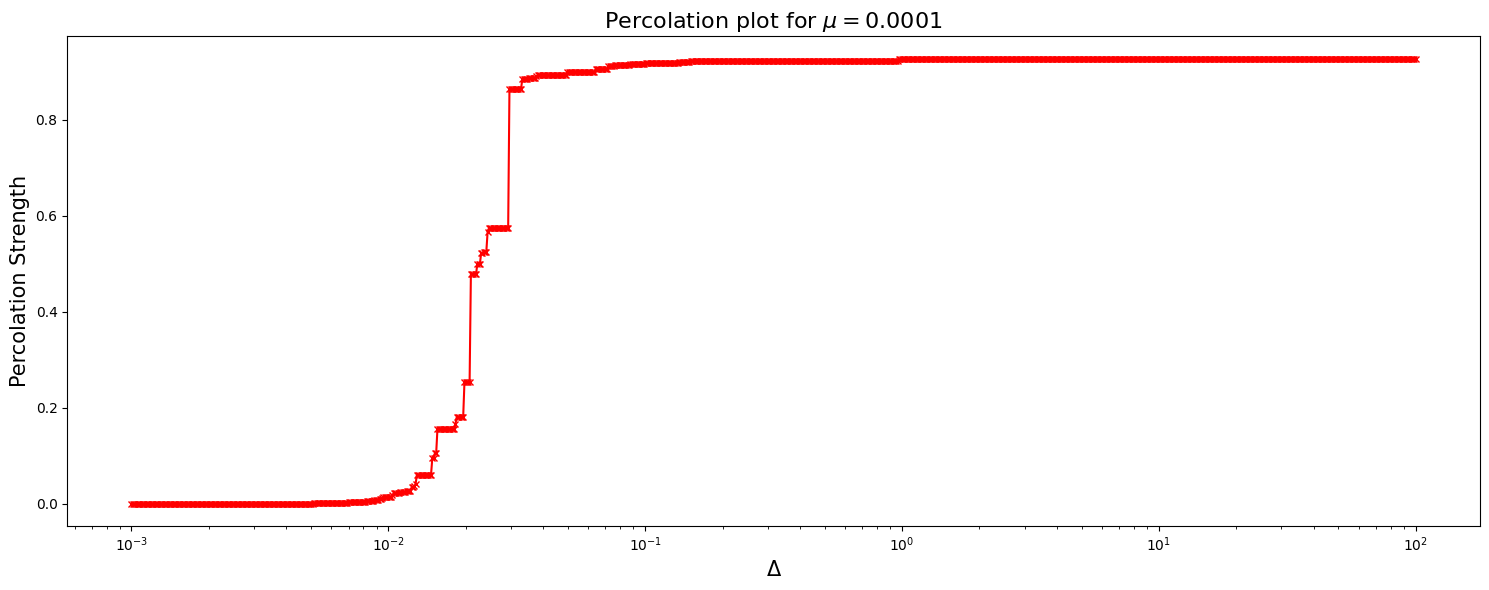

In [25]:
def calculate_percolation_strength(times_between_events, deltas):
    percolation_strengths = []

    for delta in deltas:
        cluster_sizes = []
        # Initialize the size of the current cluster
        current_cluster_size = 1 # The first event is always a cluster

        for i in range(len(times_between_events)):
            if times_between_events[i] <= delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 1: # Only consider clusters with more than one event
                    cluster_sizes.append(current_cluster_size)
                # Reset the size of the current cluster
                current_cluster_size = 1 # The next event is always a cluster

        # Add the size of the last cluster
        if current_cluster_size > 1: # Only consider clusters with more than one event
            cluster_sizes.append(current_cluster_size)

        max_cluster_size = max(cluster_sizes) 

        percolation_strengths.append(max_cluster_size / len(times_between_events))
    return percolation_strengths


# Definir los valores de delta
deltas = np.logspace(-3, 2, num=1000, base=10)

# Calcular la fuerza de percolación
percolation_strengths = calculate_percolation_strength(times_between_events, deltas)

# Graficar la fuerza de percolación en función de delta
plt.figure(figsize=(15, 6))
plt.plot(deltas, percolation_strengths, color='red', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu}', fontsize=16)
plt.tight_layout()
plt.show()


In [26]:
percolation_strengths_list = []
n_iters = 100
deltas = np.logspace(-2, 3, num=1000, base=10)
for _ in range(n_iters):
    percolation_strength = calculate_percolation_strength(times, deltas)
    percolation_strengths_list.append(percolation_strength)
    #print(f'Iteration {_} done')
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths, color = 'purple', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu} for $M=${n_iters} iterations', fontsize=16)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

## Tarea secundaria
Añadir un bucle if para contar el cluster más grande, un cluster empieza en un 0 y acaba en el último 1, los 0 identifican el comienzo de un cluster, puedo fijarme donde están y con np.where ver donde están para después restar y obtener el tamaño del cluster.

# ---------------------------------------------------------------------------------------------------

Crear función generate time series con el bucle con el algoritmo HECHO

$\Delta_1^*=log(K)/(\mu+ \sqrt{2\mu K})$

- 1: implementar el escalado logaritmico, log bining con numpy (correo)
- 2: Hacerlo con K=10**6,7, 8 solo cuando controle las otras dos
- Imprimir número de clusters para cada uno y para los puntos naranjas y rojos
- idem mu=100, cuidado que delta estrella se define de otra forma

In [3]:
def generate_series(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times, rate

In [4]:
def identify_clusters(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

# $K=10^6$ eventos

In [5]:
K = 10**6
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

Número de clusters para K=1000000, n=1, mu=0.0001, $Delta$: 1662 


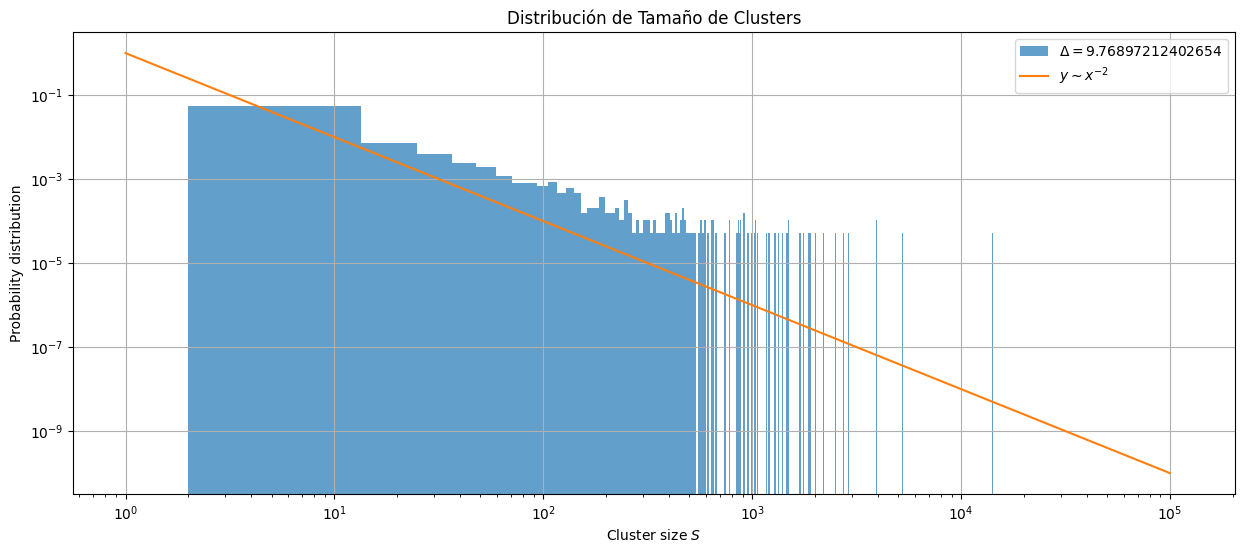

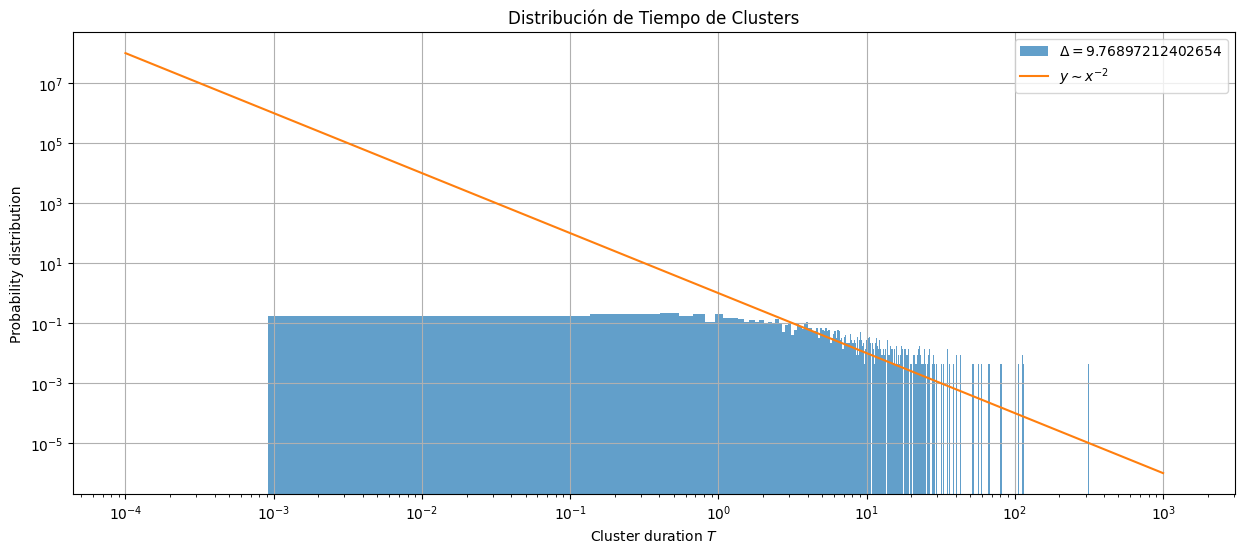

In [9]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

deltas = [delta1, delta1*10]

# Identificar clusters en la serie temporal
clusters = identify_clusters(times, delta1*10)

# Calcular el tamaño y tiempo de los clusters
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

print(f'Número de clusters para K={K}, n={n}, mu={mu}, $Delta$: {len(clusters)} ')


x1 = np.logspace(0, 5, num=100, base=10)
y1 = 1/x1**2

x2 = np.logspace(-4, 3, num=100, base=10)
y2 = 1/x2**2

# Graficar el diagrama de tamaño de clusters
plt.figure(figsize=(15, 6))
plt.hist(cluster_sizes, bins=10000, log=True, density=True, alpha=0.7, label = f'$\Delta = {deltas[1]}$')
plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster size $S$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Tamaño de Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el diagrama de tiempo de clusters
plt.figure(figsize=(15, 6))
plt.hist(cluster_times, bins=10000, log=True, density=True, alpha=0.7, label = f'$\Delta ={deltas[1]}$')
plt.plot(x2, y2, label = '$y\sim x^{-2}$')
plt.xlabel('Cluster duration $T$')
plt.ylabel('Probability distribution')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribución de Tiempo de Clusters')
plt.grid(True)
plt.legend()
plt.show()

# $K =10^7$ eventos 

In [ ]:
K = 10**7
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

In [26]:
# Parámetros iniciales
N = 10**6
n = 1
mu = 1e-4
delta = 0.1

# Generar la serie temporal de eventos
times = [0]
rate = [mu]
for i in range(N):
    rate_tk, xk = algorithm(rate[-1], mu, 1)
    rate.append(rate_tk)
    times.append(times[-1] + xk)

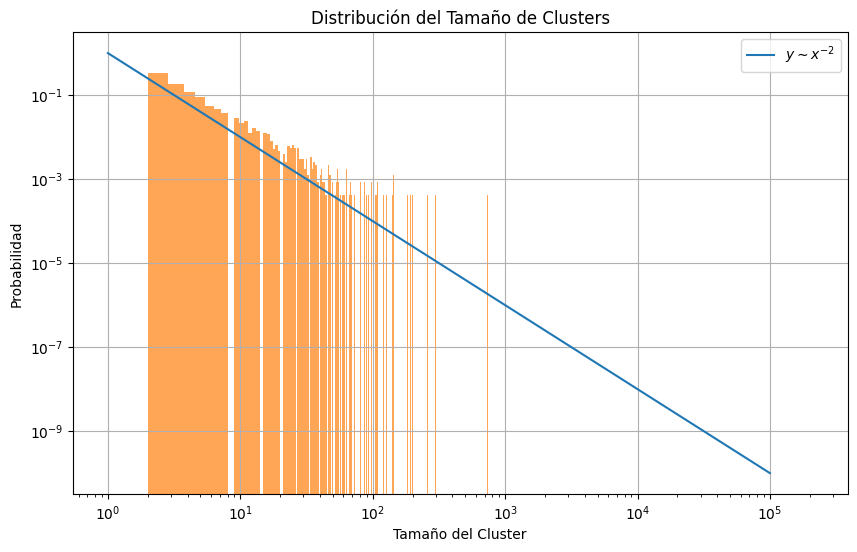

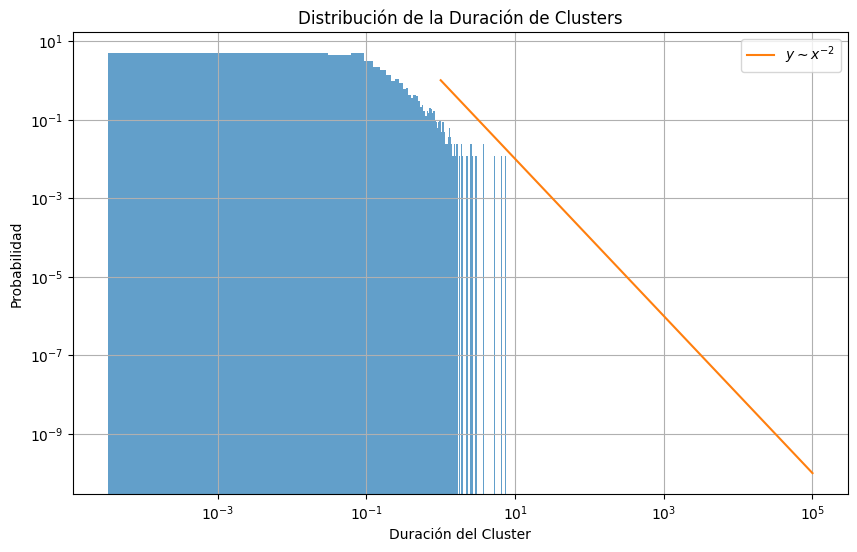

In [44]:
# Función para identificar clusters con un parámetro delta fijo
def identify_clusters(times, delta):
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

# Identificar clusters en la serie temporal
clusters = identify_clusters(times, delta)

# Calcular el tamaño y la duración de los clusters
cluster_sizes = [len(cluster) for cluster in clusters]
cluster_durations = [cluster[-1] - cluster[0] for cluster in clusters]

# Calcular histogramas en escala logarítmica
size_hist, size_bins = np.histogram(cluster_sizes, bins='auto')
duration_hist, duration_bins = np.histogram(cluster_durations, bins='auto')

x1 = np.logspace(0, 5, num=10000, base=10)
y1 = 1/x1**2
# Graficar el histograma del tamaño de los clusters en escala logarítmica
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label = '$y\sim x^{-2}$')
plt.hist(cluster_sizes, bins=size_bins, density=True, log=True, alpha=0.7)
#plt.plot(size_bins[:-1], size_hist / len(cluster_sizes), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tamaño del Cluster')
plt.ylabel('Probabilidad')
plt.title('Distribución del Tamaño de Clusters')
plt.grid(True)
plt.legend()
plt.show()

x2 = np.logspace(-3, 3, num=10000, base=10)
y2 = 1/x2**2

# Graficar el histograma de la duración de los clusters en escala logarítmica
plt.figure(figsize=(10, 6))
plt.hist(cluster_durations, bins=duration_bins, density=True, log=True, alpha=0.7)
#plt.plot(duration_bins[:-1], duration_hist / len(cluster_durations), marker='o')
plt.plot(x2, y2, label = '$y\sim x^{-2}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Duración del Cluster')
plt.ylabel('Probabilidad')
plt.title('Distribución de la Duración de Clusters')
plt.legend()
plt.grid(True)
plt.show()